### <font color =#0000FF>1.Load CIFAR-10 Database </font>

In [1]:
import keras
from keras.datasets import cifar10

#load the pre-shuffled train and test data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

### <font color =#0000FF>2.Visualize the first 24 Training Images </font>

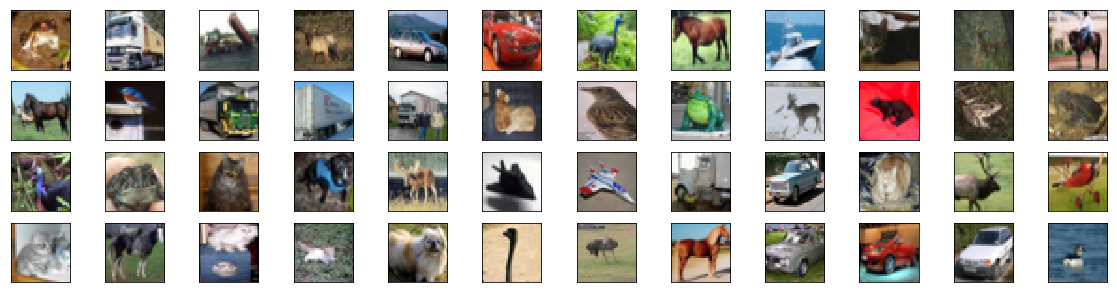

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))  #20*5為畫布大小
for i in range(48):
    ax = fig.add_subplot(4,12,i+1,xticks=[],yticks=[])#分成3列12行，依序產生,xticks,yticks不顯示東西，所以x,y坐標不會有東西
    ax.imshow(X_train[i]) #顯示出來
    

### <font color =#0000FF>3.Resclae the Images by Dividing Every Pixel in Every Image by 255 </font>

In [3]:
X_train = X_train.astype(np.float32)/255  #數值(0-255)進行正規化，介於0到1之間
X_test = X_test.astype(np.float32)/255

### <font color =#0000FF>4.Break Dataset into Training,Testing,and Validation Sets </font>

In [6]:
from keras.utils import np_utils

#one-hot encode the labels
num_classes = len(np.unique(y_train))#共10個
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

#break training set into training and validation sets
X_train,X_valid = X_train[5000:],X_train[:5000]#0-4999為X_valid,5000之後為X_train(45000個)
y_train,y_valid = y_train[5000:],y_train[:5000]

#print shape of training set
print('X_train shape:',X_train.shape)

#print number of training,validation,and test images
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')
print(X_valid.shape[0],'validation samples')

X_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### <font color =#0000FF>5. </font>

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model = Sequential() #初始化
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(32,32,3)))#2*2的kernal
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))#500neural 隱藏層
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)         

### <font color =#0000FF>6.Compile the Model </font>

In [12]:
model.compile(loss='categorical_crossentropy',optimizer = 'rmsprop',metrics=['accuracy'])


### <font color =#0000FF>7.Train the Model </font>

In [14]:
from keras.callbacks import ModelCheckpoint

#train the model
checkPointer = ModelCheckpoint(filepath='model.weight.best.hdf5',save_best_only=True,verbose=1)
#batch_size=32每次32筆,epochs=40只train 10次,shuffle為隨機抽
hist = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_valid,y_valid),
         callbacks = [checkPointer],shuffle=True,verbose=2)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 1.45406, saving model to model.weight.best.hdf5
1407/1407 - 43s - loss: 1.5937 - accuracy: 0.4224 - val_loss: 1.4541 - val_accuracy: 0.4694
Epoch 2/10

Epoch 00002: val_loss improved from 1.45406 to 1.21398, saving model to model.weight.best.hdf5
1407/1407 - 31s - loss: 1.2715 - accuracy: 0.5435 - val_loss: 1.2140 - val_accuracy: 0.5776
Epoch 3/10

Epoch 00003: val_loss improved from 1.21398 to 1.15130, saving model to model.weight.best.hdf5
1407/1407 - 29s - loss: 1.1519 - accuracy: 0.5937 - val_loss: 1.1513 - val_accuracy: 0.6052
Epoch 4/10

Epoch 00004: val_loss improved from 1.15130 to 1.00348, saving model to model.weight.best.hdf5
1407/1407 - 29s - loss: 1.0819 - accuracy: 0.6180 - val_loss: 1.0035 - val_accuracy: 0.6426
Epoch 5/10

Epoch 00005: val_loss improved from 1.00348 to 0.96699, saving model to model.weight.best.hdf5
1407/1407 - 29s - loss: 1.0429 - accuracy: 0.6354 - val_loss: 0.9670 - val_accuracy: 0.6638
Epoch 6/1

### <font color =#0000FF>8.Load the Model with the best Validation Accuracy </font>

In [17]:
model.load_weights('model.weight.best.hdf5')

### <font color =#0000FF>9.Calculate Classification Accuracy on the Test Set</font>

In [18]:
#evaluate and print test accuracy
score = model.evaluate(X_test,y_test,verbose=0)
print('\n','Test accuracy:',score[1])


 Test accuracy: 0.6809999942779541


### <font color =#0000FF>10.Visaulize Some Predictions</font>

In [19]:
#get predictions on the test set
y_hat = model.predict(X_test)

#define text labels(source:http://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


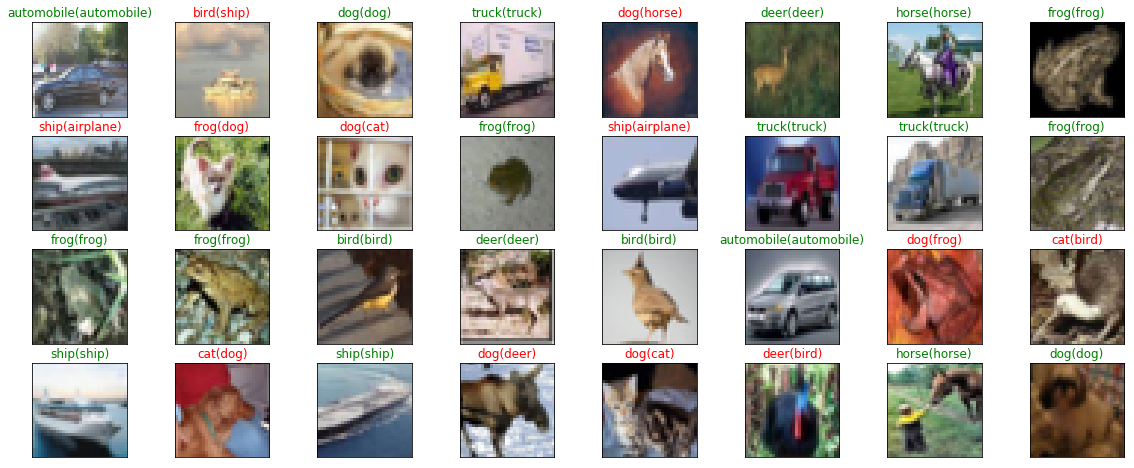

In [22]:
#plot a random sample of test images,their predicted labels, and ground truth
fig = plt.figure(figsize=(20,8))
for i,idx in enumerate(np.random.choice(X_test.shape[0],size=32,replace=False)):
    ax = fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{}({})".format(cifar10_labels[pred_idx],cifar10_labels[true_idx]),
                color = ("green"if pred_idx ==true_idx else "red"))
    